# Kerasの公式ドキュメント

https://keras.io/ja/

# 事前準備

## ライブラリとデータセットの読み込み

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.misc import toimage
from tensorflow.keras.utils import to_categorical

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10

## MNISTのデータ読み込み

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train[1]

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

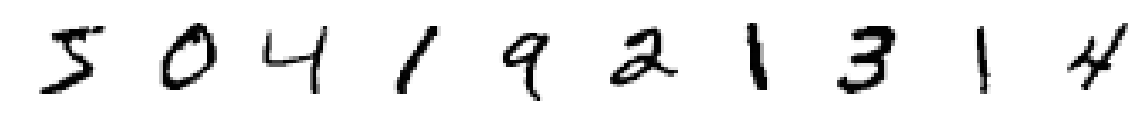

In [0]:
def print_mnist_image(data):
  fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
  for i in range(10):
    image = data[i]
    two_d = (np.reshape(image, (28, 28)) * 255).astype(np.uint8)
    subplts[i].axis('off')
    subplts[i].imshow(two_d, interpolation='nearest')
  
print_mnist_image(X_train)

In [0]:
y_train[1]

0

In [0]:
Y_train = to_categorical(y_train, 10)

In [0]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
Y_test = to_categorical(y_test, 10)


# パーセプトロンでMNIST

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mean_squared_error

### ニューラルネットワークの作成

In [0]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    loss=mean_squared_error,
    optimizer=SGD(),
    metrics=['accuracy'])

### ネットワークを学習させる

In [0]:
history = model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=100, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.0346 - acc: 0.8544 - val_loss: 0.0327 - val_acc: 0.8648
Epoch 2/5
 9410/60000 [===>..........................] - ETA: 9s - loss: 0.0332 - acc: 0.8599

KeyboardInterrupt: ignored

### 学習進行状況の表示

accが認識率、lossが教師信号との誤差

In [0]:
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

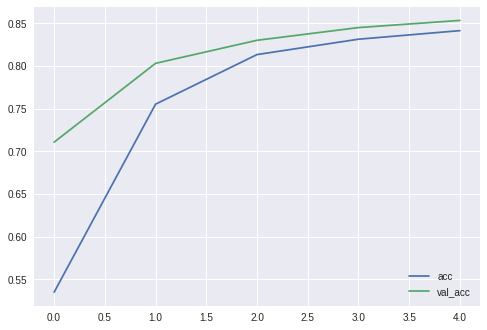

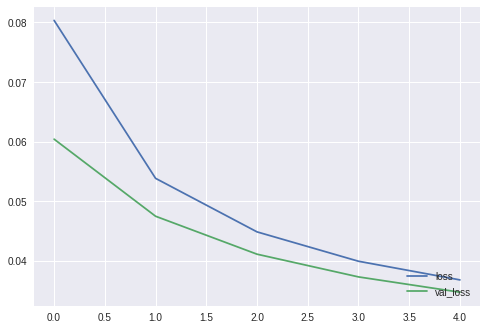

In [0]:
plot_history(history)

### 学習したネットワークで認識させる

In [0]:
def test_mnist():
    test_num = 10
    start = np.random.randint(X_test.shape[0] - test_num)
    x_test = X_test[start:start+test_num]
    y_test = Y_test[start:start+test_num]

    fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
    for i in range(10):
        image = x_test[i]
        two_d = (np.reshape(image, (28, 28)) * 255).astype(np.uint8)
        subplts[i].axis('off')
        subplts[i].imshow(two_d, interpolation='nearest')

    print(np.argmax(y_test, axis=1))

    preds = model.predict(x_test.reshape(test_num,784))
    print(np.argmax(preds, axis=1))

[5 1 1 6 4 7 1 9 4 2]
[5 1 1 6 4 7 1 9 9 2]


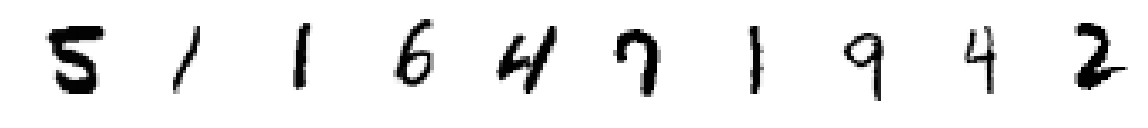

In [0]:
test_mnist()

# バックプロパゲーションでMNIST

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mean_squared_error

In [0]:
model = Sequential()
model.add(Dense(200, input_dim=784)) # 28x28
model.add(Activation("relu"))
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_48 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
activation_49 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
_________________________________________________________________
activation_50 (Activation)   (None, 10)                0         
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    loss=mean_squared_error,
    optimizer=SGD(),
    metrics=['accuracy'])

In [0]:
history = model.fit(
    X_train.reshape(60000, 784), Y_train,
     validation_data=(X_test.reshape(10000, 784), Y_test),
     batch_size=100, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 79us/step - loss: 0.1075 - acc: 0.2126 - val_loss: 0.0871 - val_acc: 0.3503
Epoch 2/3
60000/60000 [==============================] - 4s 62us/step - loss: 0.0835 - acc: 0.4146 - val_loss: 0.0802 - val_acc: 0.4595
Epoch 3/3
60000/60000 [==============================] - 4s 62us/step - loss: 0.0774 - acc: 0.4813 - val_loss: 0.0746 - val_acc: 0.5081


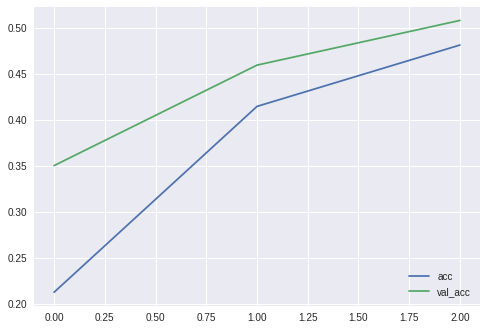

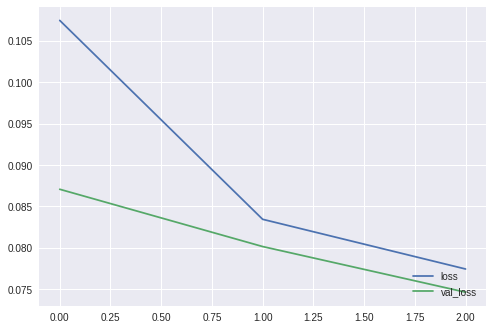

In [0]:
plot_history(history)

In [0]:
test_mnist()

### Batch Normalizationの利用

In [0]:
model = Sequential()
model.add(Dense(200, input_dim=784)) # 28x28
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(Activation("sigmoid"))

In [0]:
model.compile(
    loss=mean_squared_error,
    optimizer=SGD(),
    metrics=['accuracy'])

In [0]:
history = model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=100, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.1401 - acc: 0.1634 - val_loss: 0.0931 - val_acc: 0.2366
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0898 - acc: 0.3314 - val_loss: 0.0878 - val_acc: 0.3941
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0865 - acc: 0.4175 - val_loss: 0.0850 - val_acc: 0.4286
Epoch 4/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0834 - acc: 0.4410 - val_loss: 0.0815 - val_acc: 0.4472
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0797 - acc: 0.4624 - val_loss: 0.0775 - val_acc: 0.4764


In [0]:
plot_history(history)

In [0]:
test_mnist()

学習のオプティマイザにAdamを利用する

In [0]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=1000, epochs=5)

In [0]:
plot_history(history)

In [0]:
test_mnist()

# CNNでMNIST

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [0]:
model = Sequential()

model.add(Convolution2D(20, 3, 3, border_mode='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(40, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])
model.summary()

In [0]:
history = model.fit(X_train.reshape(60000, 28, 28, 1), Y_train,
                    validation_data=(X_test.reshape(10000, 28, 28, 1), Y_test),
                    batch_size=1000, epochs=5)

In [0]:
plot_history(history)

In [0]:
def test_mnist_cnn():
    test_num = 10
    start = np.random.randint(X_test.shape[0] - test_num)
    x_test = X_test[start:start+test_num]
    y_test = Y_test[start:start+test_num]

    fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
    for i in range(10):
        image = x_test[i]
        two_d = (np.reshape(image, (28, 28)) * 255).astype(np.uint8)
        subplts[i].axis('off')
        subplts[i].imshow(two_d, interpolation='nearest')

    print(np.argmax(y_test, axis=1))

    preds = model.predict(x_test.reshape(test_num,28,28,1))
    print(np.argmax(preds, axis=1))

In [0]:
test_mnist_cnn()

In [0]:
from sklearn.preprocessing import MinMaxScaler

# http://aidiary.hatenablog.com/entry/20161120/1479640534
def visualize_filter(model):
    W = model.layers[0].get_weights()[0]
    # (nb_filter, nb_channel, nb_row, nb_col)
    W = W.transpose(3, 2, 0, 1)
    (nb_filter, nb_channel, nb_row, nb_col) = W.shape

    plt.figure()
    for i in range(nb_filter):
        im = W[i, 0]
        scaler = MinMaxScaler(feature_range=(0, 255))
        im = scaler.fit_transform(im)

        plt.subplot(4, 8, i + 1)
        plt.axis('off')
        plt.imshow(im, cmap="gray")
    plt.show()

In [0]:
visualize_filter(model)

## Fashion MNISTの認識

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

0 	Tシャツ/トップス  
1 	ズボン  
2 	プルオーバー  
3 	ドレス  
4 	コート  
5 	サンダル  
6 	シャツ  
7 	スニーカー  
8 	バッグ  
9 	アンクルブーツ  

In [0]:
print_mnist_image(X_train)

## CIFAR10の認識

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

model.add(Convolution2D(20, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(40, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])
model.summary()

In [0]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=1000, epochs=5)

In [0]:
plot_history(history)

In [0]:
def test_cifar10():
    test_num = 10
    start = np.random.randint(X_test.shape[0] - test_num)
    x_test = X_test[start:start+test_num]
    y_test = Y_test[start:start+test_num]

    fig, subplts = plt.subplots(ncols=10, figsize=(20, 2))
    for i in range(10):
        image = x_test[i]
        two_d = (np.reshape(image, (32, 32, 3)) * 255).astype(np.uint8)
        subplts[i].axis('off')
        subplts[i].imshow(two_d, interpolation='nearest')

    print(np.argmax(y_test, axis=1))

    preds = model.predict(x_test)
    print(np.argmax(preds, axis=1))

In [0]:
test_cifar10()
# 0:airplane, 1:automobile, 2:bird, 3:cat, 4:deer, 5:dog, 6:frog, 7:horse, 8:ship, 9:truck

In [0]:
def visualize_filter_color(model):
    W = model.layers[0].get_weights()[0]
    # (nb_filter, nb_channel, nb_row, nb_col)
    W = W.transpose(3, 2, 0, 1)
    (nb_filter, nb_channel, nb_row, nb_col) = W.shape

    plt.figure()
    rgb_hash = {0: "Reds", 1: "Greens", 2: "Blues"}
    for rgb in range(3):
        for i in range(nb_filter):
            im = W[i, rgb]
            scaler = MinMaxScaler(feature_range=(0, 255))
            im = scaler.fit_transform(im)

            plt.subplot(40*3//10, 10, rgb*40 + i + 1)
            plt.axis('off')
            plt.imshow(im, cmap=rgb_hash[rgb])
    plt.show()

In [0]:
visualize_filter_color(model)

## 重みデータのsave/load

In [0]:
model.save_weights("cifar10_model_weights.h5")

In [0]:
model.load_weights("cifar10_model_weights.h5")

# TPUを使う

データサイズやネットワークが大きくなってくると学習にかかる時間が一気に増えるようになる。  
TPUを利用することでものすごく速くなる。

## もう少し大きなCNNを構築

In [0]:
from keras.layers import Conv2D

In [0]:
model = Sequential()

model.add(Conv2D(256, 3, padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2))

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2))

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(2))

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(384, 3, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(50))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])
model.summary()

In [0]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=100, epochs=1)

## TPUで学習

In [0]:
import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)

INFO:tensorflow:Querying Tensorflow master (b'grpc://10.37.169.10:8470') for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 3356538283316718482)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 7392177760527665078)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 11234668987925468587)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 17353735107135851793)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 17980851109740911654)
INFO:tensorflow:*** Available Device: _Devic

In [0]:
tpu_model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'])

INFO:tensorflow:Cloning SGD {'lr': 0.009999999776482582, 'momentum': 0.0, 'decay': 0.0, 'nesterov': False}


In [0]:
history = tpu_model.fit(X_train.reshape(60000, 784), Y_train,
                    validation_data=(X_test.reshape(10000, 784), Y_test),
                    batch_size=1000, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(125,), dtype=tf.int32, name='core_id_40'), TensorSpec(shape=(125, 784), dtype=tf.float32, name='dense_1_input_10'), TensorSpec(shape=(125, 10), dtype=tf.float32, name='activation_1_target_50')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning SGD {'lr': 0.009999999776482582, 'momentum': 0.0, 'decay': 0.0, 'nesterov': False}
INFO:tensorflow:Remapping placeholder for dense_1_input
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.SGD object at 0x7f50fc364f98> []
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 0.9521622657775879 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU lr: 0.009999999776482582 {0.01}
INFO:tensorflow:CPU -> TPU momentum: 0.0 {0.0}
INFO:tensorflow:CPU -> TPU decay: 0.0 {0.0}
59000/60000 [====================

In [0]:
model = tpu_model.sync_to_cpu()

INFO:tensorflow:Copying TPU weights to the CPU
INFO:tensorflow:TPU -> CPU lr: 0.009999999776482582
INFO:tensorflow:TPU -> CPU momentum: 0.0
INFO:tensorflow:TPU -> CPU decay: 0.0
INFO:tensorflow:TPU -> CPU nesterov: False


[4 6 1 0 4 9 4 2 0 5]
[4 6 1 0 4 9 4 4 0 4]


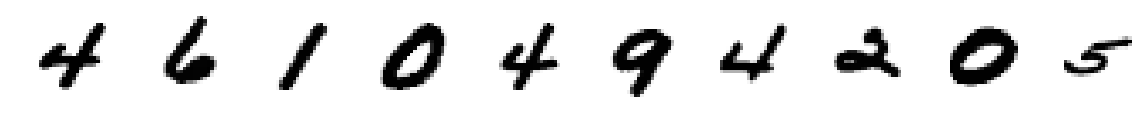

In [0]:
test_mnist()

# FunctionalAPIを使う

# data augmentation

In [0]:
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


# Google Driveのマウント方法

ColabからGoogle Drive上のファイルへアクセスすることができる。  
Google Drive上に置いてある学習データを使ったり、学習結果を保存したりできるため、必須。

左「＞」から「コードスニペット」の  
「Mounting Google Drive in your VM」の「→」選択するとすぐ貼り付けられます。

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!ls /gdrive/"My Drive"

'Colab Notebooks'    naganokogyodl	 その他
 jplus_folder	     photo		 ディープラーニング資料
'jplus_folder (1)'   pycon2018proposal


# shape_commentator

ソース中で扱っているテンソルのshapeを、コメントとして追加したソースを出力してくれる。  
自分で複雑なネットワークを書いているとshapeが合わなくなることが多いため、非常に便利。

In [0]:
!pip install shape_commentator

In [0]:
import shape_commentator

shapeを得たいソースを一旦実行します

In [0]:
a = np.array([1,2,3,4,5,6])

下記「In[9]」の数字「9」のところを上記行の［］の中の数字に置き換えた後実行します。

In [0]:
shape_commentator.comment(In[9], globals(), locals())

a = np.array([1,2,3,4,5,6])  #_ (6,),


もう少し複雑な例

In [0]:
from tensorflow.keras.layers import Conv2D, Activation, Input, MaxPool2D, Dense, Flatten

In [0]:
x = Input((28,28,1))
x = Conv2D(16, 3, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D(2)(x)
x = Flatten()(x)
x = Dense(10)(x)

In [0]:
shape_commentator.comment(In[83], globals(), locals())

x = Input((28,28,1))  #_ (?, 28, 28, 1),
x = Conv2D(16, 3, padding="same")(x)  #_ (?, 28, 28, 16),
x = Activation("relu")(x)  #_ (?, 28, 28, 16),
x = MaxPool2D(2)(x)  #_ (?, 14, 14, 16),
x = Flatten()(x)  #_ (?, 3136),
x = Dense(10)(x)  #_ (?, 10),


# TensorBoardColab

tensorflowを利用しているもののネットワークや学習historyなどをブラウザ上で確認できる。

In [0]:
!pip install tensorboardcolab
from tensorboardcolab import *

In [0]:
tbc = TensorBoardColab()
summary_writer = tbc.get_writer()

Wait for 8 seconds...
TensorBoard link:
https://9e312680.ngrok.io


In [0]:
tpu_model.fit(
    x=x_train.reshape(60000, 28, 28, 1), y=x_train.reshape(60000, 28, 28, 1),
    callbacks=[TensorBoardColabCallback(tbc)],
    batch_size=2048, epochs=10
)

Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.1603
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1582
Epoch 3/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.1564
Epoch 4/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1546
Epoch 5/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1528
Epoch 6/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1512
Epoch 7/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1497
Epoch 8/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.1480
Epoch 9/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.1465
Epoch 10/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.1451


# notify

学習が終了したらスマホへ通知を送ることができる。

In [0]:
!pip install notify-run

    100% |████████████████████████████████| 430kB 24.2MB/s 
    100% |████████████████████████████████| 61kB 17.3MB/s 
  Running setup.py bdist_wheel for notify-run ... - done
  Stored in directory: /root/.cache/pip/wheels/ee/fe/c9/2a72488b865dfa01732f6b100744bace1ec0a21ab4bed43aaa
  Running setup.py bdist_wheel for PyQRCode ... - done
  Stored in directory: /root/.cache/pip/wheels/54/61/2f/a4f51b09473db5737db0f654ed10eb9a4ee01f83a7412de349
Successfully built notify-run PyQRCode
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.20.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4


In [0]:
from notify_run import Notify
notify = Notify()
notify.register()

Endpoint: https://notify.run/ue2hWEM3XUh2uCdU
To subscribe, open: https://notify.run/c/ue2hWEM3XUh2uCdU
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

表示されたQRコードをスマホで読んで開いて認証すると、そのスマホにメッセージを送れるようになる。  
下記カラムを実行するとメッセージが送られる。

In [0]:
notify.send('Hello World.')

Keras用のcallbackが準備されているため、学習が終了したらスマホへメッセージが送られる。

In [0]:
from notify_run.keras import NotifyCallback
# model is a Keras model that you have created elsewhere.
#model.fit(x, y, callbacks=[NotifyCallback()])